# Genetic Algorithm

# Finding Non Intersecting (Hard Constraint) Convex Polygon (Soft Constraint) from a set of random points

In [1]:
import random
import matplotlib.pyplot as plt
import copy
import numpy as np
from shapely.geometry import LineString
from numpy.random import choice
from shapely.ops import polygonize, unary_union

In [2]:
fitness_function_called = 0
# Taking Input of number of points for a polygon
number_of_points = 0
while True:
    number_of_points = int(input("Please Enter the Number of points between 3 and 15 for Polygons: "))
    if number_of_points < 3 or number_of_points > 15:
        print("Incorrect Input \n")
    else:
        break

# Initializing total number of chromosomes
number_of_chromosomes = 50

Please Enter the Number of points between 3 and 15 for Polygons: 7


In [3]:
def InitialPopulation():
    # Chromosomes list will be a list of lists and will contain all the chromosomes
    chromosomes = list()

    # Some temporary variables
    temp_number_points = number_of_points
    temp_number_chromosomes = number_of_chromosomes

    # Creating initial population of chromosomes in binary
    while temp_number_chromosomes != 0:
        chromosome = []
        for i in range(0, temp_number_points):
            point_in_chromosome = []
            # Our 2D space is of 256 x 256 only
            # Creating population of chromosomes first in decimal between 0 and 255
            x = random.randint(0, 255)
            y = random.randint(0, 255)

            # Converting decimal number to binary of 8 bits for 256
            x = format(x, '08b')
            y = format(y, '08b')

            point_in_chromosome.append(x)
            point_in_chromosome.append(y)

            chromosome.append(point_in_chromosome)

        chromosomes.append(chromosome)
        temp_number_chromosomes -= 1
    return chromosomes

In [4]:
def convertToDecimalFromBinary(chromosome):
    decimal_chromosome = []
    for i in range(0, len(chromosome)):
        temp_list = []
        x_axis = int(chromosome[i][0], 2)
        y_axis = int(chromosome[i][1], 2)
        temp_list.append(x_axis)
        temp_list.append(y_axis)
        decimal_chromosome.append(temp_list)
    return decimal_chromosome

In [5]:
def DisplayPolygon(chromosome):
    # Make Decimal Chromosome from received Binary to display
    decimal_chromosome = convertToDecimalFromBinary(chromosome)
    decimal_chromosome.append(decimal_chromosome[0])  # repeat the first point to create a 'closed loop'
    xs, ys = zip(*decimal_chromosome)  # creating lists of x and y values
    plt.figure()
    plt.plot(xs, ys)
    plt.show()

In [6]:
def intersectingEdges(chromosome):
    # Creating linestrings of all lines of our polygon
    all_lines = list()
    for i in range(0, number_of_points):
        point = copy.deepcopy(chromosome[i])
        if i == number_of_points - 1:
            next_point = copy.deepcopy(chromosome[0])
        else:
            next_point = copy.deepcopy(chromosome[i + 1])
        tuple_point = tuple(point)
        tuple_next_point = tuple(next_point)
        line = LineString([tuple_point, tuple_next_point])
        all_lines.append(line)

    # Now all_lines contains all linestring objects
    # If we have 5 points then we have 5 lines
    intersecting_edges = 0
    for i in range(0, len(all_lines)):
        if i != len(all_lines) - 1:
            line1 = all_lines[i]
            for j in range(i + 1, len(all_lines)):
                line2 = all_lines[j]
                intersection_point = line1.intersection(line2)
                if intersection_point:
                    intersecting_edges += 1

    # To exclude the actual coordinates point's intersection
    intersecting_edges = intersecting_edges - number_of_points
    return intersecting_edges

In [7]:
def isConvex(chromosome):
    is_convex = True
    # Now checking if the polygon is a convex polygon i.e. all angles less than 180 degree
    # Now making three points pairs for calculating two vectors between them
    previous_traversed_edges = 0
    for i in range(0, number_of_points):
        point_a = copy.deepcopy(chromosome[i])
        if i == number_of_points - 2:
            point_b = copy.deepcopy(chromosome[i + 1])
            point_c = copy.deepcopy(chromosome[0])
        elif i == number_of_points - 1:
            point_b = copy.deepcopy(chromosome[0])
            point_c = copy.deepcopy(chromosome[1])
        else:
            point_b = copy.deepcopy(chromosome[i + 1])
            point_c = copy.deepcopy(chromosome[i + 2])

        # Point_B is our middle point always so one vector is from point_b to point_a, and other is from point_c to point_b
        # Calculating vector's x-axis and y-axis and we will have two vectors made from 3 points
        vector_1x = (point_b[0] - point_a[0])
        vector_1y = (point_b[1] - point_a[1])

        vector_2x = (point_c[0] - point_b[0])
        vector_2y = (point_c[1] - point_b[1])

        # Take Cross Product between vectors
        cross_product = (vector_1x*vector_2y - vector_1y*vector_2x)
        current_traversed_edge = copy.deepcopy(cross_product)
        # If all the cross product answers have same signs either ++, or -- then it is correct
        # so if current and previously traversed edges when multiplied get < 0 then their signs were opposite and we return False
        if current_traversed_edge != 0:
            val = current_traversed_edge * previous_traversed_edges
            if val < 0:
                is_convex = False
                return is_convex
            else:
                previous_traversed_edges = current_traversed_edge
    return is_convex

In [8]:
def intersectedArea(chromosome):
    all_lines = list()
    for i in range(0, number_of_points):
        point = copy.deepcopy(chromosome[i])
        if i == number_of_points - 1:
            next_point = copy.deepcopy(chromosome[0])
        else:
            next_point = copy.deepcopy(chromosome[i + 1])
        tuple_point = tuple(point)
        tuple_next_point = tuple(next_point)
        line = LineString([tuple_point, tuple_next_point])
        all_lines.append(line)

    # Creating a MultiLineString from unary_union which gives us a representation of union of the provided
    # geometric objects
    multilinestring = unary_union(all_lines)
    # Using polygonize() function, we can iterate over the polygons made from the lines we give it
    # The polygons we will get will be the sub-polygons of the bigger polygon
    # They are made by intersecting edges

    # Calculate intersected ares i.e. sub polygon areas
    areas = list()
    for polygon in polygonize(multilinestring):
        area = polygon.area
        area = round(area, 2)
        areas.append(area)

    # We are going to use the minimum intersected area
    minimum_intersecting_area = min(areas)
    return minimum_intersecting_area

In [9]:
def FitnessFunction(chromosome):
    global fitness_function_called
    fitness_function_called += 1
    # Getting decimal from the binary string
    decimal_chromosome = convertToDecimalFromBinary(chromosome)

    # Calculating intersecting edges in this polygon
    intersecting_edges = intersectingEdges(decimal_chromosome)

    # Getting the minimum intersected area, the polygon that has lower intersecting area will have lower fitness value
    # And we have minimization problem here
    minimum_intersecting_area = intersectedArea(decimal_chromosome)

    # If intersecting edges are zero the fitness will become zero
    # or otherwise it will be more with number of intersecting points
    fitness_value = intersecting_edges*minimum_intersecting_area
    fitness_value = round(fitness_value, 2)
    is_convex = False

    # Convex Polygon is a soft constraint, so we only check it if our intersecting_edges condition is being satisfied
    if intersecting_edges == 0:
        is_convex = isConvex(decimal_chromosome)

    return fitness_value, is_convex

In [10]:
def Crossover(parent1, parent2):
    # Single Point crossover between two chromosomes
    # The points inside the chromosome will be exchanged
    point = random.randint(0, len(parent1) - 1)  # Randomly getting Crossover point
    for i in range(point, len(parent1)):
        parent1[i], parent2[i] = parent2[i], parent1[i]
    child1 = copy.deepcopy(parent1)
    child2 = copy.deepcopy(parent2)
    return child1, child2

In [11]:
def Mutation(chromosome):
    # Mutate Two Points in a chromosome or maybe 1 point is mutated twice
    for i in range(0, 2):
        # Take a random point from a chromosome
        length = len(chromosome)
        index = random.randint(0, length - 1)

        # Mutate 2 random indices in its x and y points
        random_point_of_a_chromosome = copy.deepcopy(chromosome[index])
        point_x_axis = list(random_point_of_a_chromosome[0])
        point_y_axis = list(random_point_of_a_chromosome[1])

        # Mutating one binary digit
        random_index = random.randint(0, 7)
        if point_x_axis[random_index] == '0':
            point_x_axis[random_index] = '1'
        elif point_x_axis[random_index] == '1':
            point_x_axis[random_index] = '0'
        if point_y_axis[random_index] == '0':
            point_y_axis[random_index] = '1'
        elif point_y_axis[random_index] == '1':
            point_y_axis[random_index] = '0'

        # Mutating another binary digit
        random_index = random.randint(0, 7)
        if point_x_axis[random_index] == '0':
            point_x_axis[random_index] = '1'
        elif point_x_axis[random_index] == '1':
            point_x_axis[random_index] = '0'
        if point_y_axis[random_index] == '0':
            point_y_axis[random_index] = '1'
        elif point_y_axis[random_index] == '1':
            point_y_axis[random_index] = '0'

        str_point_x_axis = ''.join(point_x_axis)
        str_point_y_axis = ''.join(point_y_axis)
        temp_list = [str_point_x_axis, str_point_y_axis]
        chromosome[index] = copy.deepcopy(temp_list)

    # A new chromosome with mutated values at some indices will be returned from this function
    return chromosome

In [12]:
def RouletteWheelSelection(all_chromosomes):
    fitness_values = list()
    for i in range(0, len(all_chromosomes)):
        fitness_value, convex = FitnessFunction(all_chromosomes[i])
        fitness_values.append(fitness_value)

    total_fitness = sum(fitness_values)
    flag = False
    # If total fitness iz zero in this generation, then we have our answer here, so we return as it is
    # This check will make sure we do not get a 'Division by zero' error
    if total_fitness == 0:
        flag = True
    if flag is True:
        return all_chromosomes

    if flag is False:
        probabilities = list()
        for i in range(0, len(fitness_values)):
            probability = fitness_values[i]/total_fitness
            probabilities.append(probability)

        # Fitness value is actually the number of intersecting edges
        # As we have a minimization problem i.e. we need to have higher probability for lower number of intersecting edges
        # So do prob = 1 - prob and dividing by length of population-1 to normalize in range 0-1
        for i in range(0, len(probabilities)):
            probabilities[i] = (1 - probabilities[i])/(len(probabilities)-1)

        numpy_index_chromosomes = list()
        for i in range(0, len(probabilities)):
            numpy_index_chromosomes.append(i)

        numpy_index_chromosomes = np.array(numpy_index_chromosomes)
        new_chromosomes_indices = np.random.choice(numpy_index_chromosomes, number_of_chromosomes, p=probabilities)

        # Now new chromosomes has indices of the chromosomes that are selected,
        # we can extract new chromosomes from selected indices
        new_chromosomes = list()
        for i in range(0, number_of_chromosomes):
            index = new_chromosomes_indices[i]
            new_chromosomes.append(all_chromosomes[index])
        return new_chromosomes

In [13]:
def displayPopulation(all_chromosomes):
    print("\n")
    print("-----------------The population of GA chromosomes in Binary are: ----------------")
    for i in range(0, number_of_chromosomes):
        print("Number: ", i+1, " ", all_chromosomes[i])
        print("--------------------------")

In [14]:
def GeneticAlgorithm():
    # Making the initial Population for our Genetic Algorithm
    # The population number is defined in the start
    chromosomes_population = InitialPopulation()
    total_iterations = 0
    best_chromosome = []
    best_fitness = 10000000000
    best_convex = False
    best_chromosomes_of_generations = list()
    while total_iterations < 2000:
        # Now first, we will check fitness of all the chromosomes we have in this iteration's population
        # If we get a chromosome that satisfies all conditions, break the loop and store that one
        for i in range(0, len(chromosomes_population)):
            fitness_value, convex = FitnessFunction(chromosomes_population[i])
            # When fitness is less than best_fitness and either convex is true or best_convex is false
            if fitness_value < best_fitness:
                if best_convex is False or convex is True:
                    best_fitness = fitness_value
                    best_chromosome = copy.deepcopy(chromosomes_population[i])
                    best_convex = convex
                    best_chromosomes_of_generations.append(best_chromosome)
            # If same fitness comes, then we check if convex is true
            if fitness_value == best_fitness:
                if convex is True:
                    best_fitness = fitness_value
                    best_chromosome = copy.deepcopy(chromosomes_population[i])
                    best_convex = convex
                    best_chromosomes_of_generations.append(best_chromosome)
            # The point where we get our desired result
            if best_fitness == 0 and best_convex is True:
                print("Iteration number where result found: ", total_iterations)
                return best_chromosome, best_fitness, best_convex, best_chromosomes_of_generations

        # Select 10 pairs of parents randomly (i.e. 20 chromosomes) and do a crossover between them
        selection_number = 10
        while selection_number > 0:
            chromosome1_index = random.randint(0, number_of_chromosomes - 1)
            chromosome2_index = random.randint(0, number_of_chromosomes - 1)

            chromosome1 = copy.deepcopy(chromosomes_population[chromosome1_index])
            chromosome2 = copy.deepcopy(chromosomes_population[chromosome2_index])

            child1, child2 = Crossover(chromosome1, chromosome2)

            chromosomes_population.append(child1)
            chromosomes_population.append(child2)

            selection_number -= 1

        # Now select 10 chromosomes randomly and apply mutation on them, which will make more chromosomes
        selection_number = 10
        while selection_number > 0:
            chromosome1_index = random.randint(0, number_of_chromosomes - 1)
            chromosome1 = copy.deepcopy(chromosomes_population[chromosome1_index])

            mutated_chromosome = Mutation(chromosome1)

            chromosomes_population.append(mutated_chromosome)

            selection_number -= 1

        # Now our population has increased because of children chromosomes by crossover and mutated chromosomes from mutation
        # Now we will do Roulette Wheel Selection for downsizing our population to same number of chromosomes which were in start
        # Roulette Wheel Selection will provide us with new population for our next GA Iteration
        new_chromosomes = RouletteWheelSelection(chromosomes_population)
        chromosomes_population = copy.deepcopy(new_chromosomes)
        total_iterations += 1
    print("Iteration number where result found: ", total_iterations)
    return best_chromosome, best_fitness, best_convex, best_chromosomes_of_generations

Iteration number where result found:  84


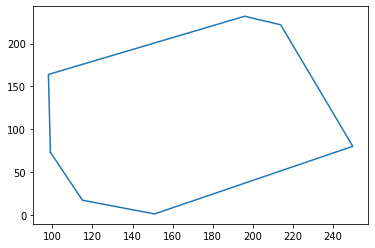

Fitness val:  0.0  and convex:  True
Fitness Function is called:  10948  times
----------Displaying Best Polygon of all Generations--------


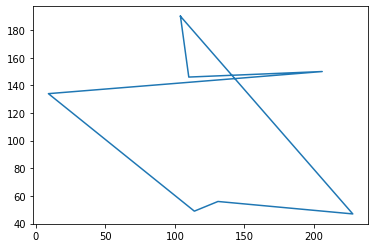

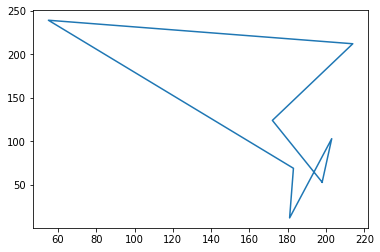

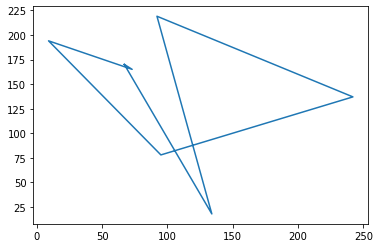

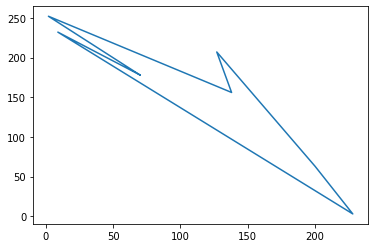

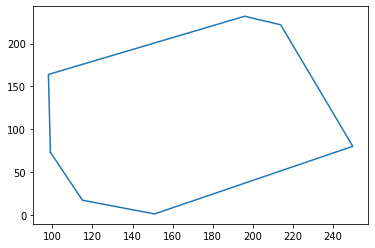

In [15]:
if __name__ == "__main__":
    fittestPolygon, value, convex, best_generations = GeneticAlgorithm()
    DisplayPolygon(fittestPolygon)
    print("Fitness val: ", value, " and convex: ", convex)
    print("Fitness Function is called: ", fitness_function_called, " times")

    print("----------Displaying Best Polygon of all Generations--------")
    for i in range(0, len(best_generations)):
        DisplayPolygon(best_generations[i])